# TESTING QUERIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools
import operator
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('../../artists.csv')

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (2,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
dataset.head()

,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


In [4]:
#Select artist info based on name
print(dataset.loc[dataset['artist_mb'] == 'Eminem'].tags_mb)

4    turkish; rap; american; hip-hop; hip hop; hiph...
Name: tags_mb, dtype: object


In [4]:
#Select all artist by country
print(dataset.loc[dataset['country_mb'] == 'Belgium'].artist_mb)

683                          Hooverphonic
1209                              Stromae
1767                              Soulwax
1889                               Cartel
2269                     Stars of the Lid
                        ...              
1465680                             Zool.
1465713                              Aran
1465801                 Guilty As Charged
1465847                              Kobo
1465868    Mimile & les Bribeux d' Toubac
Name: artist_mb, Length: 15461, dtype: object


In [5]:
#Select all artist by genre
print(dataset.loc[dataset['tags_mb'].str.contains("hip hop", na=False)].artist_mb)

3          pop; dance; hip hop; reggae; contemporary r b;...
4          turkish; rap; american; hip-hop; hip hop; hiph...
6          synthpop; pop; american; hip-hop; hip hop; ele...
11         rock; alternative rock; industrial rock; metal...
19         trip-hop; rock; electronic; alternative rock; ...
                                 ...                        
1464791                                              hip hop
1465200                                              hip hop
1465369                                              hip hop
1465372    rap; hip hop; pop rap; soul and reggae; boom b...
1465645                                              hip hop
Name: tags_mb, Length: 4448, dtype: object


In [12]:
print(type(dataset['tags_mb'][1]))
    

<class 'str'>


In [14]:
#Give a bar graph of most popular genres

genres = {}


@functools.lru_cache(maxsize=None)
def check_tag(tag, amount):
    amount = round(amount, 2)
    
    if tag in genres:
        genres[tag] += amount

    else:
        genres[tag] = amount
for i in range(100000):


for i in range(100000):
    rec = dataset['tags_mb'][i]
    
    #print(dataset['tags_mb'][i])
    if type(rec) == str:
        
        #print(rec)

        rec_tags = rec.split(';')

        #for i in range(len(rec_tags)):
        #    rec_tags[i] = rec_tags[i].strip
        
        #print(rec_tags)
        
        for tag in rec_tags:
            check_tag(tag, dataset['listeners_lastfm'][i] / 100)

print(genres)
        
        

{'rock': 9890616.779999964, ' pop': 3298454.0300000026, ' alternative rock': 3427669.010000005, ' british': 4072655.7800000077, ' uk': 4496079.4700000025, ' britannique': 1115551.3300000005, ' britpop': 466431.2200000001, ' pop rock': 5194235.059999981, ' piano pop': 80485.26, ' piano rock': 360751.66, ' english': 3433244.730000004, ' parlophone': 190031.7, ' rock and indie': 4975795.470000005, ' ambient pop': 194796.12999999998, ' pop/rock': 1101694.9999999995, ' chapel': 53815.67, ' post-britpop': 78037.51999999999, ' electronic': 1326462.6299999994, ' grunge': 374683.99000000005, ' art rock': 883918.8800000001, ' experimental rock': 457641.56999999995, ' chamber pop': 425972.95, ' england': 975798.2999999996, ' melancholic': 48947.52, ' oxford': 89466.24000000002, ' bootleg': 47325.28, ' c’était mieux avant': 75472.57999999999, ' art pop': 768092.0999999997, ' nude': 47325.28, ' sacred cows': 47325.28, ' 80s': 663723.5299999998, ' 90s': 618699.0399999999, ' rap': 279927.31, ' metal'

[Text(0, 0, 'rock'),
 Text(1, 0, ' american'),
 Text(2, 0, ' pop rock'),
 Text(3, 0, ' rock and indie'),
 Text(4, 0, ' classic pop and rock'),
 Text(5, 0, ' uk'),
 Text(6, 0, ' british'),
 Text(7, 0, ' english'),
 Text(8, 0, ' alternative rock'),
 Text(9, 0, ' pop')]

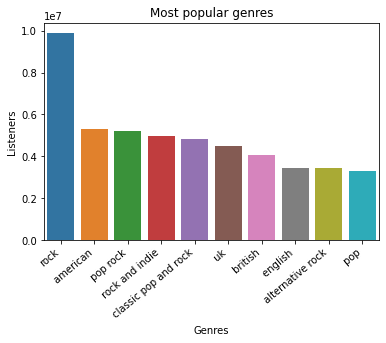

In [34]:
sorted_d = dict( sorted(genres.items(), key=operator.itemgetter(1),reverse=True))

short_dict =list(sorted_d.items())[:10]

my_df = pd.DataFrame(short_dict)
ax = sns.barplot(x=0, y=1, data=my_df)
#x.set_xticklabels(rotation=30)
ax.set(xlabel = 'Genres', ylabel='Listeners', title='Most popular genres')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, genres, width, label='Men')

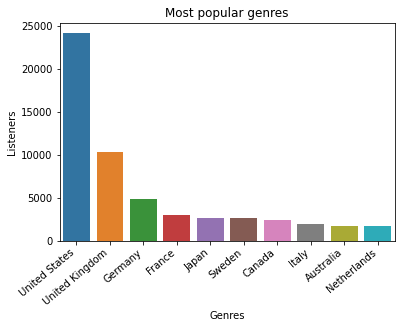

In [9]:
countries = {}

def check_country(tag):
    
        if tag in countries:
            countries[tag] += 1
        else:
            countries[tag] = 1

def get_sorted_countries():
    for i in range(100000):
        rec = dataset['country_mb'][i]
    
        if type(rec) == str:
            check_country(rec)

    sorted_d = dict( sorted(countries.items(), key=operator.itemgetter(1),reverse=True))
    short_dict =list(sorted_d.items())[:10]
    
    my_df = pd.DataFrame(short_dict)
    ax = sns.barplot(x=0, y=1, data=my_df)
    #x.set_xticklabels(rotation=30)
    ax.set(xlabel = 'Genres', ylabel='Listeners', title='Most popular genres')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

get_sorted_countries()